In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
p_demand=ctrl.Antecedent(np.arange(0,11,1),'p_demand')
press=ctrl.Antecedent(np.arange(0,11,1),'press')
reputation=ctrl.Antecedent(np.arange(0,5.1,0.1),'reputation')
profit=ctrl.Antecedent(np.arange(0,11,1),'profit')
s_demand=ctrl.Antecedent(np.arange(0,11,1),'s_demand')
dis=ctrl.Consequent(np.arange(0,71,1),'dis')

In [ ]:
p_demand['low']=fuzz.trimf(p_demand.universe,[0,2,4])
p_demand['medium']=fuzz.trimf(p_demand.universe,[3,5,7])
p_demand['high']=fuzz.trimf(p_demand.universe,[6,8,10])

In [ ]:
press['low']=fuzz.trimf(press.universe,[0,2,4])
press['medium']=fuzz.trimf(press.universe,[3,5,7])
press['high']=fuzz.trimf(press.universe,[6,8,10])

In [ ]:
reputation['low']=fuzz.trimf(reputation.universe,[0,2,4])
reputation['medium']=fuzz.trimf(reputation.universe,[3,4,4.5])
reputation['high']=fuzz.trimf(reputation.universe,[4.2,4.5,5])

In [ ]:
profit['low']=fuzz.trimf(profit.universe,[0,2,4])
profit['medium']=fuzz.trimf(profit.universe,[3,5,7])
profit['high']=fuzz.trimf(profit.universe,[6,8,10])

In [ ]:
s_demand['none']=fuzz.trimf(s_demand.universe,[0,2,4])
s_demand['medium']=fuzz.trimf(s_demand.universe,[3,5,7])
s_demand['high']=fuzz.trimf(s_demand.universe,[6,8,10])

In [ ]:
dis['very low']=fuzz.trimf(dis.universe,[0,2,5])
dis['low']=fuzz.trimf(dis.universe,[4,8,10])
dis['medium']=fuzz.trimf(dis.universe,[8,15,20])
dis['high']=fuzz.trimf(dis.universe,[18,30,40])
dis['very high']=fuzz.trimf(dis.universe,[39,50,70])

In [ ]:
rule1=ctrl.Rule(p_demand['high']& press['low']& profit['low'], dis['very low'])
rule2=ctrl.Rule(p_demand['low']& press['high']& profit['high'], dis['high'])
rule3=ctrl.Rule(reputation['high']& profit['medium']& s_demand['high'], dis['medium'])
rule4=ctrl.Rule(press['high']& s_demand['high']& profit['high'], dis['very high'])
rule5=ctrl.Rule(reputation['low']& p_demand['high']& profit['low'], dis['medium'])
rule6=ctrl.Rule(p_demand['high']& s_demand['none']& press['low'], dis['very low'])
rule7=ctrl.Rule(profit['high']& press['medium']& s_demand['medium'], dis['medium'])


discount 14.222222222222223


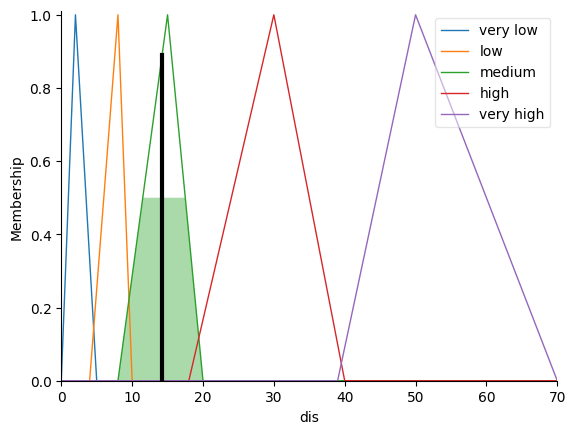

In [ ]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])
system=ctrl.ControlSystemSimulation(control_system)
system.input['p_demand']=8
system.input['press']=5
system.input['reputation']=4.2
system.input['profit']=8
system.input['s_demand']=6
system.compute()
print('discount',system.output['dis'])
dis.view(sim=system)